In [25]:
using CSV, DataFrames, Plots, Statistics, TimeSeries

In [ ]:
c1 = theme_palette(:auto).colors.colors[1]
c2 = theme_palette(:auto).colors.colors[2]
c3 = theme_palette(:auto).colors.colors[3]

In [7]:
df = CSV.read("data/D8DU.csv", DataFrame)

Row,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RClose
,String31,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,2007-11-30 00:00:00+08:00,0.179292,0.180738,0.167725,0.179292,1536000,0.0,0.0,0.179292
2,2007-12-03 00:00:00+08:00,0.179292,0.179292,0.179292,0.179292,854000,0.0,0.0,0.180004
3,2007-12-04 00:00:00+08:00,0.179292,0.179292,0.1764,0.1764,1048000,0.0,0.0,0.177824
4,2007-12-05 00:00:00+08:00,0.1764,0.1764,0.1764,0.1764,2175000,0.0,0.0,0.178535
5,2007-12-06 00:00:00+08:00,0.1764,0.185076,0.1764,0.182184,1798000,0.0,0.0,0.185031
6,2007-12-07 00:00:00+08:00,0.182184,0.182184,0.182184,0.182184,0,0.0,0.0,0.185743
7,2007-12-10 00:00:00+08:00,0.185076,0.185076,0.182184,0.182184,123000,0.0,0.0,0.186455
8,2007-12-11 00:00:00+08:00,0.18363,0.185076,0.182184,0.185076,816000,0.0,0.0,0.190058
9,2007-12-12 00:00:00+08:00,0.18363,0.18363,0.18363,0.18363,88000,0.0,0.0,0.189324


In [ ]:
df2 = last(df, 3000)

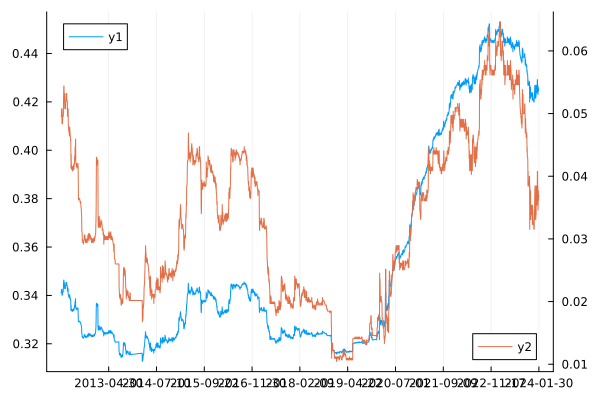

In [24]:
plot(SubString.(df2.Date, 1, 10), df2.RClose)
plot!(twinx(), df2.Close, color=c2)

In [50]:
percentchange(df2.Close)

UndefVarError: UndefVarError: `percentchange` not defined

In [29]:
var(df2.RClose)

0.001980508906388394

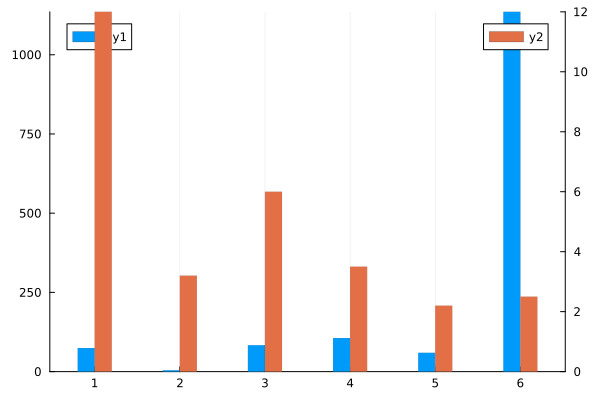

In [49]:
data1 = [74.4, 4.3, 83.4, 105.8, 59.4, 1135.53]  # REIT market cap (US$BIL)
data2 = [12, 3.2, 6, 3.5, 2.2, 2.5]  # Percentage of stock market cap
xs = [1, 2, 3, 4, 5, 6]
x_labels = ["Singapore", "China", "Australia", "Japan", "UK", "United States"]

bar_width = 0.2
bar_style = Dict(:linewidth => 0, :bar_width => bar_width)

bar(xs .-0.1, data1; bar_style...)
bar!(twinx(), xs .+ 0.1 , data2, color=c2; bar_style...)

In [64]:
data = CSV.read("dividend/data.txt", DataFrame)

Row,Year,SG,US,China,Average
,Int64,Float64,Float64,Float64,Float64
1,2023,5.8,2.58,7.13,5.17
2,2022,4.25,2.5,6.42,4.39
3,2021,3.46,1.59,5.9,3.65
4,2020,4.37,2.85,5.64,4.29
5,2019,4.34,2.41,4.8,3.85
6,2018,3.65,2.57,4.75,3.66
7,2017,2.7,1.77,3.23,2.57
8,2016,3.64,1.83,5.32,3.6
9,2015,3.58,1.95,5.41,3.65


In [86]:
years = collect(2003:2023)
plot(years, data.SG, label="SG")
plot!(years, data.China, label="CN")
plot!(years, data.US, label="US")
# plot!(years, data.Average, label="Average")
savefig("dividend/sg_cn_us.png")

"/Users/wuvist/code/sgx3000/dividend/sg_cn_us.png"